In [11]:
import pandas as pd

In [48]:
IDEAM_station_path_base = r"C:\Users\juanc\Google Drive\DS4All_Team28\Listado Estaciones IDEAM 1990-2020" 

IDEAM_station_path = IDEAM_station_path_base + r"\Cat_logo_Nacional_de_Estaciones_del_IDEAM.csv"
IDEAM_station_path_out = IDEAM_station_path_base + r"\Cat_logo_Nacional_de_Estaciones_del_IDEAM_active.csv"

station_installed = '2000-01-01' #2000-01-01 #datetime.date(year=2000,month=1,day=1)
station_suspended = '1990-01-01' #2018-12-31 #datetime.date(year=2018,month=12,day=31)

categoria_valid = ["Limnigráfica", "Limnimétrica", "Pluviográfica", "Pluviométrica", "Climática Ordinaria", "Climática Principal", "Meteorológica Especial"]

IDEAM_station_dtypes = {
    "Categoria": "category",
    "Tecnologia": "category",
    "Estado": "category",
    "Departamento": "category",
    "Municipio": "category",
    "Area Operativa": "category",
    "Corriente": "category",
    "Area Hidrografica": "category",
    "Zona Hidrografica": "category",
    "Subzona hidrografica": "category",
    "Entidad": "category"
}

In [49]:
stations = pd.read_csv(
    IDEAM_station_path,
    sep=";",
    dtype=IDEAM_station_dtypes,
    #usecols=list(dtypes) + ["birthday", "last_name"],
    parse_dates=["Fecha_instalacion", "Fecha_suspension"],
    dayfirst=True
)

In [50]:
print(stations.dtypes)

Codigo                           int64
Nombre                          object
Categoria                     category
Tecnologia                    category
Estado                        category
Departamento                  category
Municipio                     category
Ubicación                       object
Altitud                         object
Fecha_instalacion       datetime64[ns]
Fecha_suspension        datetime64[ns]
Area Operativa                category
Corriente                     category
Area Hidrografica             category
Zona Hidrografica             category
Subzona hidrografica          category
Entidad                       category
dtype: object


In [51]:
#stations.columns = stations.columns.str.replace(" ", "_").replace("ó", "o")
stations.rename(columns=lambda x: x.lower().replace(" ", "_").replace("ó", "o"), inplace=True)

In [52]:
import re
def ubicacion2XY(u):
    arr = re.split("[,\(\)]", u)
    return pd.Series([arr[2], arr[1]])
stations[["x","y"]] = stations.ubicacion.apply(ubicacion2XY)

stations.nombre = stations.nombre.apply(lambda x: re.split(" \[", x)[0])

In [53]:
stations.head()

,codigo,nombre,categoria,tecnologia,estado,departamento,municipio,ubicacion,altitud,fecha_instalacion,fecha_suspension,area_operativa,corriente,area_hidrografica,zona_hidrografica,subzona_hidrografica,entidad,x,y
0,52057100,RUMICHACA - AUT,Limnigráfica,Automática con Telemetría,Activa,Nariño,Ipiales,"(0.81378611, -77.66197778)","2,582",2016-11-15,NaT,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-77.66197778,0.81378611
1,52055170,LA JOSEFINA - AUT,Climática Principal,Automática con Telemetría,Activa,Nariño,Contadero,"(0.93030556, -77.49119444)","2,45",2005-12-10,NaT,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-77.49119444,0.93030556
2,52055220,EL PARAISO - AUT,Climática Principal,Automática con Telemetría,Activa,Nariño,Túquerres,"(1.07061111, -77.63688889)","3,12",2004-03-01,NaT,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-77.63688889,1.07061111
3,44015070,EL PEPINO - AUT,Climática Principal,Automática con Telemetría,Activa,Putumayo,Mocoa,"(1.08288889, -76.66711111)",760,2005-11-11,NaT,Area Operativa 07 - Nariño-Putumayo,Guaitara,Amazonas,Caquetá,Alto Caqueta,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-76.66711111,1.08288889
4,48015040,PUERTO NARINO - AUT,Climática Principal,Automática con Telemetría,Activa,Amazonas,Puerto Nariño,"(-3.78030556, -70.36263889)",158,2005-07-19,NaT,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Amazonas,Amazonas,Amazonas - Directos,Directos Río Amazonas (mi),INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-70.36263889,-3.78030556


In [60]:
#stations.categoria.cat.categories
print(f"Categorías:{','.join(categoria_valid)}")
stations["categoria_incluida"] = stations.categoria.isin(categoria_valid)
    
print(f"Instalada antes de:{station_installed} Suspendida posterior a:{station_suspended}")
stations["periodo_incluido"] = \
                ((stations.fecha_instalacion <= station_installed) 
                    & ((stations.fecha_suspension >= station_suspended)
                      | (stations.fecha_suspension.isna())))

stations.head()

Categorías:Limnigráfica,Limnimétrica,Pluviográfica,Pluviométrica,Climática Ordinaria,Climática Principal,Meteorológica Especial
Instalada antes de:2000-01-01 Suspendida posterior a:1990-01-01


,codigo,nombre,categoria,tecnologia,estado,departamento,municipio,ubicacion,altitud,fecha_instalacion,...,area_operativa,corriente,area_hidrografica,zona_hidrografica,subzona_hidrografica,entidad,x,y,categoria_incluida,periodo_incluido
0,52057100,RUMICHACA - AUT,Limnigráfica,Automática con Telemetría,Activa,Nariño,Ipiales,"(0.81378611, -77.66197778)","2,582",2016-11-15,...,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-77.66197778,0.81378611,True,False
1,52055170,LA JOSEFINA - AUT,Climática Principal,Automática con Telemetría,Activa,Nariño,Contadero,"(0.93030556, -77.49119444)","2,45",2005-12-10,...,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-77.49119444,0.93030556,True,False
2,52055220,EL PARAISO - AUT,Climática Principal,Automática con Telemetría,Activa,Nariño,Túquerres,"(1.07061111, -77.63688889)","3,12",2004-03-01,...,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-77.63688889,1.07061111,True,False
3,44015070,EL PEPINO - AUT,Climática Principal,Automática con Telemetría,Activa,Putumayo,Mocoa,"(1.08288889, -76.66711111)",760,2005-11-11,...,Area Operativa 07 - Nariño-Putumayo,Guaitara,Amazonas,Caquetá,Alto Caqueta,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-76.66711111,1.08288889,True,False
4,48015040,PUERTO NARINO - AUT,Climática Principal,Automática con Telemetría,Activa,Amazonas,Puerto Nariño,"(-3.78030556, -70.36263889)",158,2005-07-19,...,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Amazonas,Amazonas,Amazonas - Directos,Directos Río Amazonas (mi),INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-70.36263889,-3.78030556,True,False


In [56]:
#stations_categoria.columns
stations.groupby(["categoria_incluida", "periodo_incluido"]).codigo.count()

categoria_incluida  periodo_incluido
False               False                129
                    True                  60
True                False               3617
                    True                5167
Name: codigo, dtype: int64

In [73]:
stations_active = stations.loc[(stations.categoria_incluida) & (stations.periodo_incluido),
                               ~stations.columns.isin(["categoria_incluida", "periodo_incluido"])]

In [79]:
stations_active.shape

(5167, 19)

In [75]:
stations_active.categoria.cat.remove_unused_categories(inplace=True)

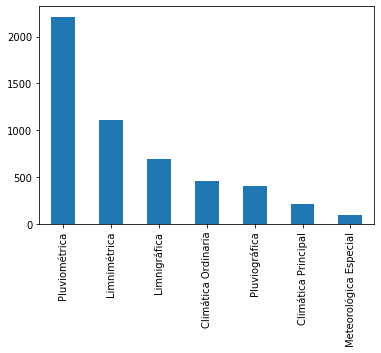

In [76]:
import matplotlib.pyplot as plt
stations_active.categoria.value_counts().plot(kind='bar')

In [77]:
pd.pivot_table(stations_active, values='codigo', index=['categoria'],
                    columns=['estado'], aggfunc='count',margins=True)

estado,Activa,En Mantenimiento,Suspendida,All
categoria,,,,
Climática Ordinaria,331.0,8.0,113.0,452
Climática Principal,166.0,NaN,43.0,209
Limnigráfica,549.0,3.0,135.0,687
Limnimétrica,771.0,3.0,335.0,1109
Meteorológica Especial,61.0,NaN,37.0,98
Pluviográfica,337.0,NaN,63.0,400
Pluviométrica,1950.0,2.0,260.0,2212
All,4165.0,16.0,986.0,5167


In [78]:
stations_active.to_csv(IDEAM_station_path_out, date_format='%d/%m/%Y', index = False)

In [81]:
IDEAM_station_dtypes = {
    "categoria": "category",
    "tecnologia": "category",
    "estado": "category",
    "departamento": "category",
    "municipio": "category",
    "area_operativa": "category",
    "corriente": "category",
    "area_hidrografica": "category",
    "zona_hidrografica": "category",
    "subzona_hidrografica": "category",
    "entidad": "category"
}
stations_active = pd.read_csv(
    IDEAM_station_path_out,
    sep=",",
    dtype=IDEAM_station_dtypes,
    #usecols=list(dtypes) + ["birthday", "last_name"],
    parse_dates=["fecha_instalacion", "fecha_suspension"],
    dayfirst=True
)
stations_active.head()

,codigo,nombre,categoria,tecnologia,estado,departamento,municipio,ubicacion,altitud,fecha_instalacion,fecha_suspension,area_operativa,corriente,area_hidrografica,zona_hidrografica,subzona_hidrografica,entidad,x,y
0,44037040,EL ROSARIO - AUT,Limnigráfica,Automática con Telemetría,Activa,Caquetá,Florencia (Caquetá),"(1.72525, -75.66638889)",600,1964-08-15,NaT,Area Operativa 04 - Huila-Caquetá,CarañO,Amazonas,Caquetá,Río Orteguaza,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-75.666389,1.725250
1,52077020,LOS NORTES - AUT,Limnigráfica,Automática con Telemetría,Activa,Nariño,Cumbitara,"(1.74111111, -77.53111111)",340,1984-09-15,NaT,Area Operativa 07 - Nariño-Putumayo,Patia,Pacifico,Patía,Río Patia Medio,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-77.531111,1.741111
2,21017050,PITALITO 2 - AUT,Limnigráfica,Automática con Telemetría,Activa,Huila,Pitalito,"(1.84883333, -76.05244444)","1,25",1972-05-15,NaT,Area Operativa 04 - Huila-Caquetá,Guarapas,Magdalena Cauca,Alto Magdalena,Alto Magdalena,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-76.052444,1.848833
3,52077010,PUENTE PUSMEO - AUT,Limnigráfica,Automática con Telemetría,Activa,Nariño,Cumbitara,"(1.62405556, -77.47891667)",380,1965-09-15,NaT,Area Operativa 07 - Nariño-Putumayo,Patia,Pacifico,Patía,Río Patia Medio,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-77.478917,1.624056
4,51027060,SAN JUAN MIRA - AUT,Limnigráfica,Automática con Telemetría,Activa,Nariño,Tumaco,"(1.42388889, -78.67027778)",2,1980-12-15,NaT,Area Operativa 07 - Nariño-Putumayo,Mira,Pacifico,Mira,Río Mira,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-78.670278,1.423889


In [82]:
for categoria in stations_active.categoria.cat.categories:
    df = stations_active[stations_active.categoria == categoria]
    categoria_file = categoria.lower().replace(" ", "_").replace("á", "a").replace("é", "e").replace("ó", "o")
    df.to_csv(IDEAM_station_path_base + f"\\est_{categoria_file}.csv", date_format='%d/%m/%Y', index = False)

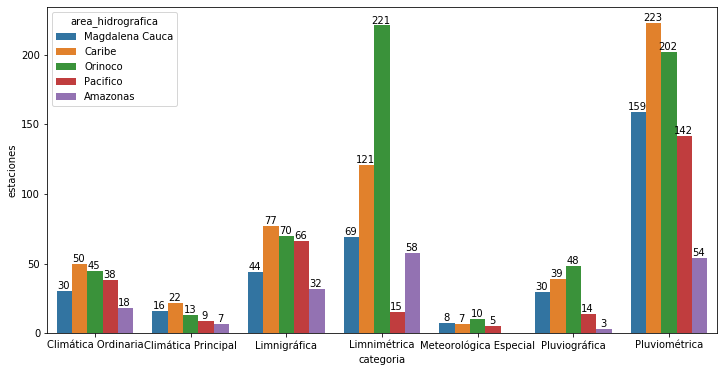

In [83]:
import seaborn as sns
stations_active_counts = \
                    (stations_active
                     .groupby(["categoria"])["area_hidrografica"]
                     .value_counts()#normalize=True
                     .rename("estaciones")
                     #.mul(100)
                     .reset_index()
                     .sort_values("categoria"))

import numpy as np
stations_active_counts.estaciones = \
            stations_active_counts.estaciones / \
            np.where(stations_active_counts.area_hidrografica=="Magdalena Cauca", 10, 1)

plt.figure(figsize=(12, 6))
g = sns.barplot(x="categoria", y="estaciones", hue="area_hidrografica", data=stations_active_counts)
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.07, p.get_height()),
            ha='center', va='bottom',
            color= 'black')

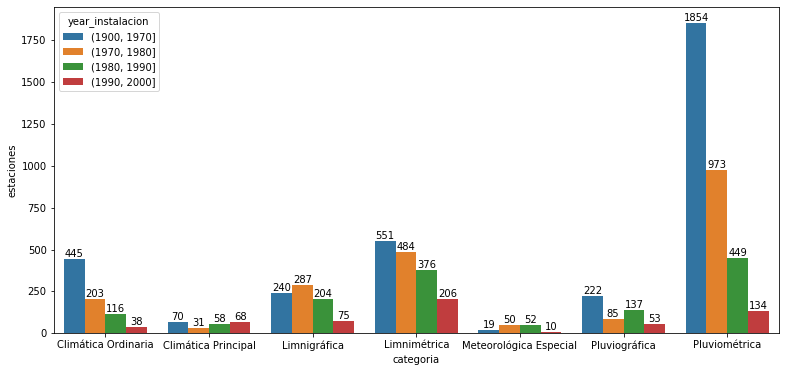

In [116]:
year_bins = [1900, 1970, 1980, 1990, 2000]

stations_active_year_counts_bins = \
                    (stations_active
                     .groupby(["categoria", pd.cut(stations_active.fecha_instalacion.dt.year, year_bins)])["codigo"]
                     #.value_counts()#normalize=True
                     .count()
                     .rename_axis(['categoria','year_instalacion'])
                     #.reset_index()
                     .rename("estaciones")
                     #.rename(columns=["categoria","year_instalacion","estaciones"])
                     #.mul(100)
                     .reset_index()
                     #.sort_values("categoria")
                    )

plt.figure(figsize=(13, 6))
g = sns.barplot(x="categoria", y="estaciones", hue="year_instalacion", data=stations_active_year_counts_bins)
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()),
            ha='center', va='bottom',
            color= 'black')

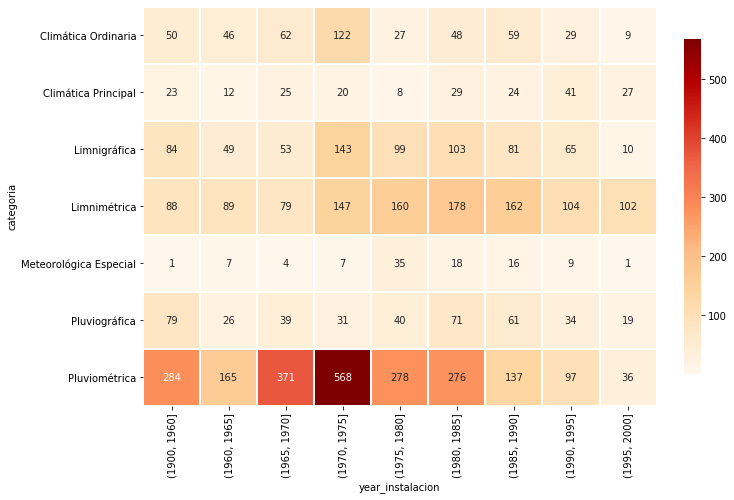

In [71]:
#https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib
year_bins = pd.interval_range(start=1900, freq=60, end=1960, closed='right')
year_bins = year_bins.append(pd.interval_range(start=1960, freq=5, end=2000, closed='right'))

stations_active_year_counts_bins = \
                    (stations_active
                     .groupby(["categoria", pd.cut(stations_active.fecha_instalacion.dt.year, year_bins)])
                     .size()
                     .rename_axis(['categoria','year_instalacion'])
                     .unstack()
                    )


plt.figure(figsize=(10,10))
g = sns.heatmap(
    stations_active_year_counts_bins, 
    square=True, # make cells square
    cbar_kws={'fraction' : 0.03}, # shrink colour bar
    cmap='OrRd', # use orange/red colour map
    linewidth=1, # space between cells
    annot=True, fmt="d"
)
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [118]:
import geopandas as gpd

In [119]:
cities_path = r"C:\Users\juanc\Google Drive\DS4All_Team28\Mapas\colombia_municipios\mpio.shp"

In [120]:
cities_map = gpd.read_file(cities_path)

In [121]:
from shapely.geometry import Point

stations_active.x = pd.to_numeric(stations_active.x)
stations_active.y = pd.to_numeric(stations_active.y)
#stations_active_categoria.dtypes

stations_map = gpd.GeoDataFrame(
    stations_active.drop(['x', 'y'], axis=1),
    crs={'init': 'epsg:4326'},
    geometry=[Point(xy) for xy in zip(stations_active.x, stations_active.y)])

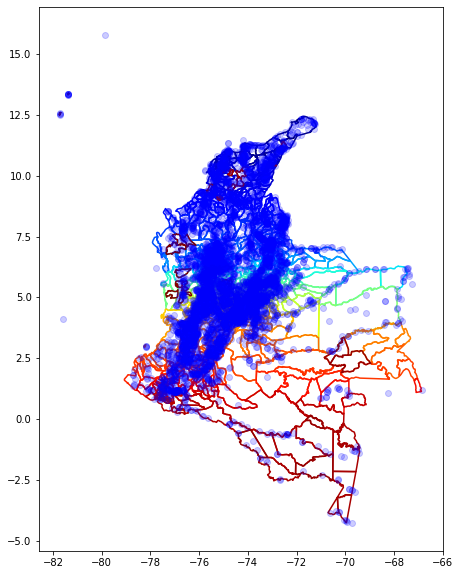

In [124]:
cities_map = cities_map.to_crs(stations_map.crs)

fig, ax = plt.subplots(figsize=(10, 10))

#add_basemap(ax, zoom=10)

#cities_map.plot(cmap="jet", column = "DPTO", ax=ax) #MPIO,DPTO
cities_map.boundary.plot(cmap="jet", ax=ax, zorder=1) #MPIO,DPTO
stations_map.plot(ax=ax, alpha = 0.2, zorder=2, color="blue")

#stations_map_categories = stations_map.groupby('categoria')
#for name, group in stations_map_categories:
    #group.plot(ax=ax, alpha = 0.4, zorder=2)
    #x.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)

#cities_map.apply(lambda x: ax.annotate(s=x.NOMBRE_MPI, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

In [125]:
#stations_active_categoria.head(1)
query_categoria = "Climática Principal"
query_departamento = "Caldas"

stations_active[(stations_active.categoria == query_categoria)
                          & (stations_active.departamento == query_departamento)].head(5)

,codigo,nombre,categoria,tecnologia,estado,departamento,municipio,ubicacion,altitud,fecha_instalacion,fecha_suspension,area_operativa,corriente,area_hidrografica,zona_hidrografica,subzona_hidrografica,entidad,x,y
331,26155150,LAS BRISAS - AUT [26155150],Climática Principal,Automática con Telemetría,Activa,Caldas,Villamaria,"(4.93452778, -75.35038889)","4,133",1981-10-14 19:00:00,NaT,Area Operativa 09 - Cauca-Valle-Caldas,0,Magdalena Cauca,Medio Magdalena,Río Gualí,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-75.350389,4.934528
1095,26155120,AEROPUERTO SANTAGUEDA [26155120],Climática Principal,Convencional,Suspendida,Caldas,Palestina (Caldas),"(5.08333333, -75.68333333)",933,1949-01-15 00:00:00,1990-01-15,Area Operativa 09 - Cauca-Valle-Caldas,Lengupa,Magdalena Cauca,Cauca,Río Chinchiná,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-75.683333,5.083333
4890,26145040,BELLA LA [26145040],Climática Principal,Convencional,Activa,Caldas,Viterbo,"(5.06666667, -75.86666667)",880,1992-06-15 00:00:00,NaT,Area Operativa 09 - Cauca-Valle-Caldas,Qda Santa Barbara,Magdalena Cauca,Cauca,Río Risaralda,FEDERACION NACIONAL DE CAFETEROS,-75.866667,5.066667
4901,26155190,ALGARROBO EL [26155190],Climática Principal,Convencional,Activa,Caldas,Manizales,"(5.06666667, -75.58333333)","1,202",1992-11-15 00:00:00,NaT,Area Operativa 09 - Cauca-Valle-Caldas,Qda Santa Barbara,Magdalena Cauca,Cauca,Río Chinchiná,FEDERACION NACIONAL DE CAFETEROS,-75.583333,5.066667
5613,26155090,SANTAGUEDA [26155090],Climática Principal,Convencional,Activa,Caldas,Palestina (Caldas),"(5.08333333, -75.66666667)","1,01",1964-01-15 00:00:00,NaT,Area Operativa 09 - Cauca-Valle-Caldas,Qda Santa Barbara,Magdalena Cauca,Cauca,Río Chinchiná,FEDERACION NACIONAL DE CAFETEROS,-75.666667,5.083333


In [102]:
query_codigo = 26187040
stations.loc[(stations.codigo == query_codigo)] #["codigo", "categoria","fecha_instalacion","fecha_suspension"]

,codigo,nombre,categoria,tecnologia,estado,departamento,municipio,ubicacion,altitud,fecha_instalacion,...,area_operativa,corriente,area_hidrografica,zona_hidrografica,subzona_hidrografica,entidad,x,y,categoria_incluida,periodo_incluido
163,26187040,QUITASUENO - AUT,Limnigráfica,Automática con Telemetría,Activa,Caldas,Aguadas,"(5.72113889, -75.55258333)",560,2014-03-09 19:00:00,...,Area Operativa 01 - Antioquia-Chocó,Arma,Magdalena Cauca,Cauca,Río Arma,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,-75.55258333,5.72113889,True,False


In [101]:
stations_active.loc[(stations_active.codigo == query_codigo), ["codigo", "categoria","fecha_instalacion","fecha_suspension"]]

,codigo,categoria,fecha_instalacion,fecha_suspension
430,26180250,Pluviográfica,1994-04-14,NaT
